## 코랩 한글 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,769 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

# CCTV 현황 그래프로 분석하기

> 서울시 CCTV 현황(구별)<br>
> 서울시 인구수(구별) 데이터 가져오기

* 사전에 파일을 코랩에 추가해야지 실행가능<br>좌측에 폴더모양 아이콘 클릭 후 업로드

## 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
# cctv 데이터 불러오기

cctv_df = pd.read_excel('seoul_cctv.xlsx')


# 인구 데이터 불러오기

pop_df = pd.read_csv('seoul_population.csv', encoding='cp949')

## 데이터 분석 및 정제 (실습파트)

In [ ]:
# cctv 데이터 상단 5항목 보기

cctv_df.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [ ]:
# 칼럼(열) 이름 바꾸기
# '기관명' -> '구별', '소계' -> '총CCTV수'

cctv_df.rename(columns={'기관명':'구별', '소계':'총CCTV수'}, inplace=True)

In [ ]:
# cctv 데이터 전반적인 정보 확인 (Null 값 있는지 확인)

cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     object 
 1   총CCTV수    25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [ ]:
# Null값 0으로 채우고 확인 

cctv_df.fillna(0, inplace=True)
cctv_df

,구별,총CCTV수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [ ]:
# 인구 데이터 상단 4항목 보기

pop_df.head(4)

,행정구역별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,강남구,542364,259611,282753
1,강동구,427573,211816,215757
2,강북구,319164,156071,163093
3,강서구,596949,290079,306870


In [ ]:
# 칼럼명 확인

pop_df.columns

Index(['행정구역별', '총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)'], dtype='object')

In [ ]:
# 칼럼명 변경
# ['구별', '총인구수', '남자인구수', '여자인구수']

pop_df.columns = ['구별', '총인구수', '남자인구수', '여자인구수']

In [ ]:
# 인구 데이터 전반적인 정보 확인 (Null 값 있는지 확인)

pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   총인구수    25 non-null     int64 
 2   남자인구수   25 non-null     int64 
 3   여자인구수   25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


## 데이터 합치기 (실습파트)

In [ ]:
# cctv_df, pop_df 열방향(좌우측)으로 데이터프레임 합치기
# '구별' 칼럼을 기준으로 합치기

df_merge = pd.merge(pop_df, cctv_df, on='구별')

In [ ]:
# 전체 데이터 확인하기(바로실행)

df_merge

,구별,총인구수,남자인구수,여자인구수,총CCTV수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,542364,259611,282753,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,427573,211816,215757,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,319164,156071,163093,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,596949,290079,306870,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,501957,252160,249797,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,355559,172794,182765,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,404497,200417,204080,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,233917,118915,115002,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,543752,263919,279833,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,339413,166160,173253,858,197.0,66.0,8.0,185,59,155,117,71


## 시각화 그래프로 분석하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  # 나눔고딕 한글폰트 설정
%matplotlib inline 

In [ ]:
df_merge.head()

,구별,총인구수,남자인구수,여자인구수,총CCTV수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,542364,259611,282753,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,427573,211816,215757,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,319164,156071,163093,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,596949,290079,306870,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,501957,252160,249797,3985,430.0,56.0,419.0,487,609,619,694,671


In [ ]:
len(df_merge)

25

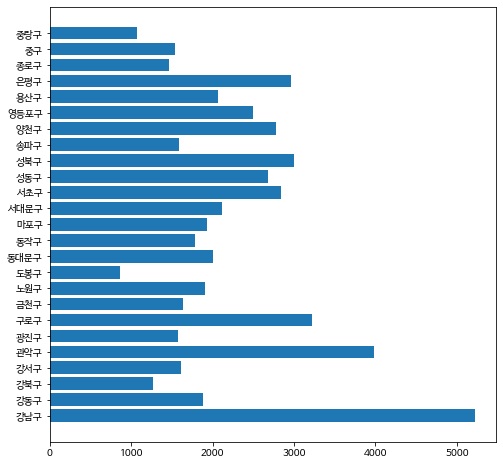

In [ ]:
y = np.arange(len(df_merge))

plt.figure(figsize=(8,8))
plt.barh(y, df_merge['총CCTV수'])
plt.yticks(y, df_merge['구별'])  # yticks 텍스트를 입력
plt.show()

In [ ]:
df_merge.sort_values('총CCTV수', inplace=True)

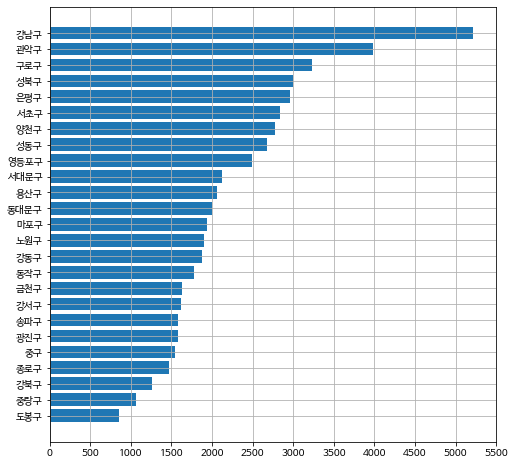

In [ ]:
y = np.arange(len(df_merge))

plt.figure(figsize=(8,8))
plt.barh(y, df_merge['총CCTV수'])
plt.grid()
plt.xticks(np.arange(0, 6000, 500))
plt.yticks(y, df_merge['구별'])
plt.show()

* 가설1: 인구수가 많으면 CCTV가 많이 설치 되어 있다.

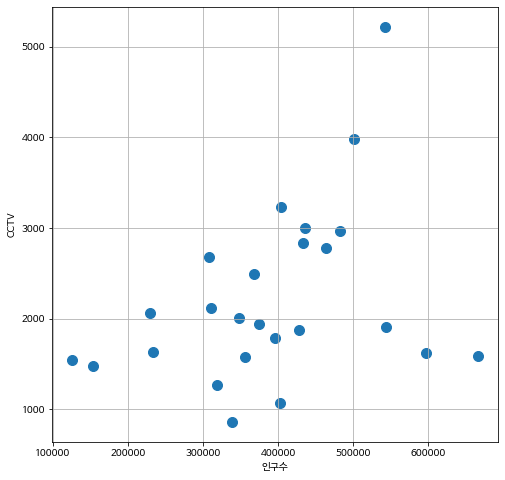

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_merge['총인구수'], df_merge['총CCTV수'], s=100)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [ ]:
# 이부분은 수학적 내용이 포함되어 있기에 설명을 스킵합니다.
fp1 = np.polyfit(df_merge['총인구수'], df_merge['총CCTV수'], 1)  # 총인구수와 총CCTV수를 대표하는 직선 그리기
f1 = np.poly1d(fp1)

x = np.linspace(100000, 700000, 100)
y = f1(x)

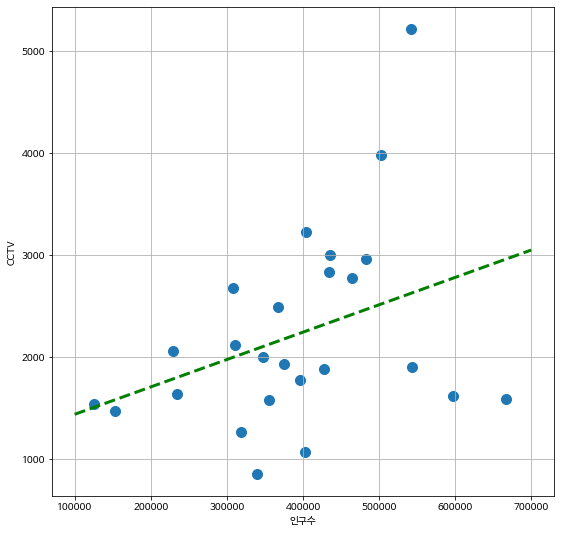

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(df_merge['총인구수'], df_merge['총CCTV수'], s=100)
plt.plot(x, y, ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

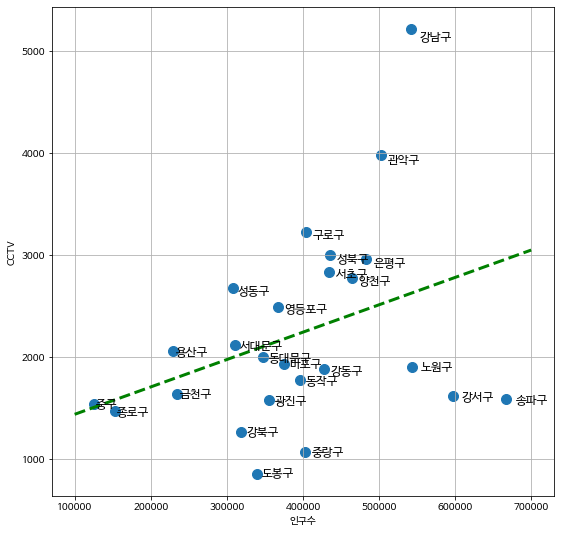

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(df_merge['총인구수'], df_merge['총CCTV수'], s=100)
plt.plot(x, y, ls='dashed', lw=3, color='g')

for n in range(len(df_merge)): # plt.text를 사용하여 좌표내에 텍스트 표시
    plt.text(df_merge['총인구수'][n]*1.02, df_merge['총CCTV수'][n]*0.98,
             df_merge['구별'][n], fontsize=12)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 범죄 데이터 분석

In [ ]:
# 지역별 범죄현황 데이터 불러오기
crime_df = pd.read_csv('seoul_crime.csv', encoding='cp949')

In [ ]:
# 기본 정보 확인
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
# 상위 데이터 확인
crime_df.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,4
3,중부,강도,검거,4
4,중부,강간,발생,127


In [ ]:
# 칼럼별 해당 갯수 확인하기
crime_df['구분'].value_counts()

방배     10
종로     10
성동     10
중랑     10
금천     10
마포     10
영등포    10
강북     10
서부     10
강남     10
종암     10
노원     10
남대문    10
관악     10
중부     10
구로     10
수서     10
송파     10
동대문    10
서초     10
은평     10
동작     10
서대문    10
강동     10
혜화     10
양천     10
광진     10
강서     10
성북     10
도봉     10
용산     10
Name: 구분, dtype: int64

In [ ]:
# 그룹화 하기
crime_df = crime_df.groupby(['구분']).sum()

In [ ]:
crime_df.head()

,건수
구분,
강남,7858
강동,6966
강북,6857
강서,8461
관악,9125


In [ ]:
crime_df = crime_df.reset_index()
crime_df.head()

,구분,건수
0,강남,7858
1,강동,6966
2,강북,6857
3,강서,8461
4,관악,9125


In [ ]:
crime_df.rename(columns={'구분':'구별'}, inplace=True)

In [ ]:
crime_df['구별'] = crime_df['구별'] + '구'

In [ ]:
crime_df.head()

,구별,건수
0,강남구,7858
1,강동구,6966
2,강북구,6857
3,강서구,8461
4,관악구,9125


In [ ]:
place_name = df_merge['구별'].tolist()

In [ ]:
print(place_name)
print(len(place_name))

['도봉구', '중랑구', '강북구', '종로구', '중구', '광진구', '송파구', '강서구', '금천구', '동작구', '강동구', '노원구', '마포구', '동대문구', '용산구', '서대문구', '영등포구', '성동구', '양천구', '서초구', '은평구', '성북구', '구로구', '관악구', '강남구']
25


In [ ]:
crime_df = crime_df[crime_df['구별'].isin(place_name)].reset_index(drop=True)
crime_df.head()

,구별,건수
0,강남구,7858
1,강동구,6966
2,강북구,6857
3,강서구,8461
4,관악구,9125


In [ ]:
crime_df.rename(columns={'건수':'범죄건수'}, inplace=True)

In [ ]:
total_df = pd.merge(df_merge, crime_df, on='구별')
total_df.head()

,구별,총인구수,남자인구수,여자인구수,총CCTV수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,범죄건수
0,도봉구,339413,166160,173253,858,197.0,66.0,8.0,185,59,155,117,71,3607
1,중랑구,403209,200419,202790,1068,0.0,0.0,0.0,770,102,121,66,9,7400
2,강북구,319164,156071,163093,1265,243.0,88.0,141.0,74,145,254,1,319,6857
3,종로구,153065,74825,78240,1471,8.0,7.0,599.0,132,195,148,281,101,3778
4,광진구,355559,172794,182765,1581,470.0,42.0,83.0,87,64,21,468,346,6825


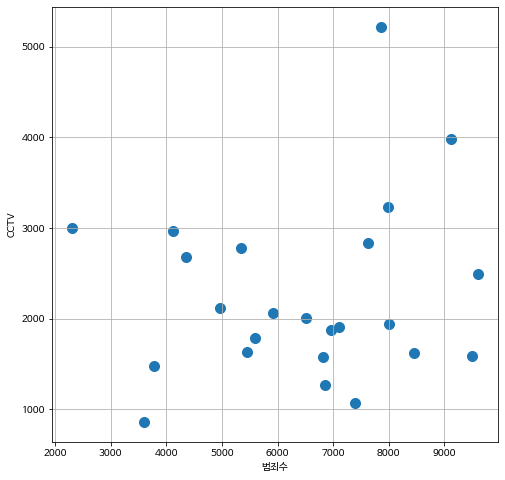

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(total_df['범죄건수'], total_df['총CCTV수'], s=100)
plt.xlabel('범죄수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [ ]:
# 이부분은 수학적 내용이 포함되어 있기에 설명을 스킵합니다.
fp1 = np.polyfit(total_df['범죄건수'], total_df['총CCTV수'], 1)  # 범죄건수와 총CCTV수를 대표하는 직선 그리기
f1 = np.poly1d(fp1)

x = np.linspace(2000, 10000, 100)
y = f1(x)

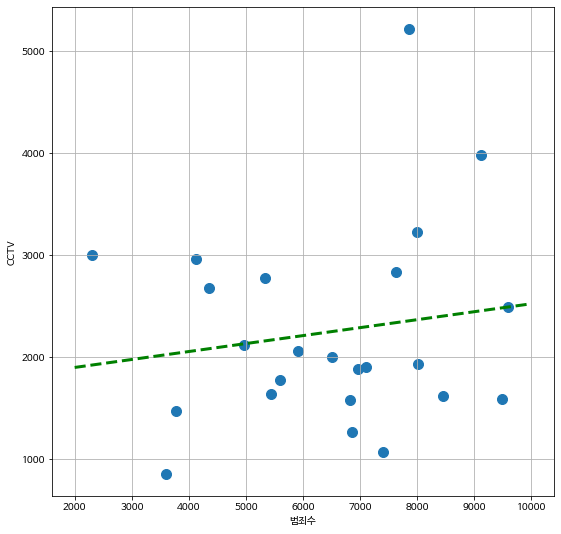

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(total_df['범죄건수'], total_df['총CCTV수'], s=100)
plt.plot(x, y, ls='dashed', lw=3, color='g')
plt.xlabel('범죄수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

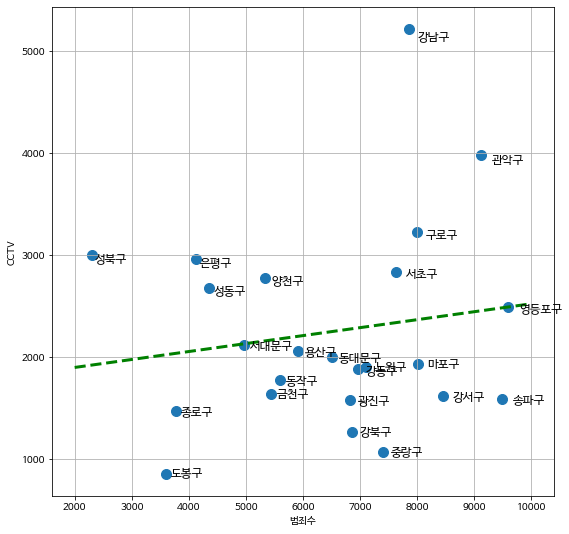

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(total_df['범죄건수'], total_df['총CCTV수'], s=100)
plt.plot(x, y, ls='dashed', lw=3, color='g')

for n in range(len(total_df)): # plt.text를 사용하여 좌표내에 텍스트 표시
    plt.text(total_df['범죄건수'][n]*1.02, total_df['총CCTV수'][n]*0.98,
             total_df['구별'][n], fontsize=12)

plt.xlabel('범죄수')
plt.ylabel('CCTV')
plt.grid()
plt.show()